In [5]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

### 1.Prepare data

In [3]:
p1 = X_train_part1[:5000]
p2 = X_train_part1[5000:10000]

In [ ]:
p1[]

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/224/5k/X_train_224.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 671.02454662323 seconds


In [3]:
len(X_train_part1)

70000

In [4]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/224/5k/X_validate_224.npy')

print('Loading X_test...')
X_test = np.load('/home/zxt/data/224/5k/X_test_224.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/224/5k/Y_train_224.npy')
Y_validate = np.load('/home/zxt/data/224/5k/Y_validate_224.npy')
Y_test = np.load('/home/zxt/data/224/5k/Y_test_224.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_validate...
Loading X_test...
Loading labels...
Running time: 287.6623902320862 seconds


In [2]:
# # import the npy dataset
# # 2k 224 npy
# from time import time
# import numpy as np

# start_time = time()

# # print('Loading X_train_part1')
# # X_train_part1 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part1.npy')
# # print('Loading X_train_part2')
# # X_train_part2 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part2.npy')
# # print('Loading X_train_part3')
# # X_train_part3 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part3.npy')
# # print('Loading X_train_part4')
# # X_train_part4 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part4.npy')
# # print('Loading X_train_part5')
# # X_train_part5 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part5.npy')
# # print('Loading X_train_part6')
# # X_train_part6 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part6.npy')
# # print('Loading X_train_part7')
# # X_train_part7 = np.load('/home/zxt/data/new_npy/224/5k/X_train_part7.npy')

# print('Loading X_validate_part1')
# X_validate_part1 = np.load('/home/zxt/data/new_npy/224/5k/X_validate_part1.npy')
# print('Loading X_validate_part2')
# X_validate_part2 = np.load('/home/zxt/data/new_npy/224/5k/X_validate_part2.npy')

# print('Loading X_test')
# X_test = np.load('/home/zxt/data/new_npy/224/5k/X_test.npy')

# print('Loading labels......')
# Y_train = np.load('/home/zxt/data/new_npy/224/5k/Y_train.npy')
# Y_validate = np.load('/home/zxt/data/new_npy/224/5k/Y_validate.npy')
# Y_test = np.load('/home/zxt/data/new_npy/224/5k/Y_test.npy')

# end_time = time()
# print('Running time: %s seconds'%(end_time - start_time))

Loading X_train_part1
Loading X_train_part2
Loading X_train_part3
Loading X_train_part4
Loading X_train_part5
Loading X_train_part6
Loading X_train_part7
Loading X_validate_part1
Loading X_validate_part2
Loading X_test
Loading labels......
Running time: 867.654994726181 seconds


In [3]:
# print('X_train_part1: '+str(len(X_train_part1)))
# print('X_train_part2: '+str(len(X_train_part2)))
# print('X_train_part3: '+str(len(X_train_part3)))
# print('X_train_part4: '+str(len(X_train_part4)))
# print('X_train_part5: '+str(len(X_train_part5)))
# print('X_train_part6: '+str(len(X_train_part6)))
# print('X_train_part7: '+str(len(X_train_part7)))

# print('X_validate_part1: '+str(len(X_validate_part1)))
# print('X_validate_part2: '+str(len(X_validate_part2)))

X_train_part1: 10000
X_train_part2: 10000
X_train_part3: 10000
X_train_part4: 10000
X_train_part5: 10000
X_train_part6: 10000
X_train_part7: 10000
X_validate_part1: 10000
X_validate_part2: 11000


In [ ]:
# X_train = np.vstack((X_train_part1,X_train_part2,X_train_part3,X_train_part4,X_train_part5,X_train_part6,X_train_part7))

In [ ]:
# X_validate = np.vstack((X_validate_part1, X_validate_part2))

In [10]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (70000, 224, 224, 3)
70000 train samples
21000 validate samples
9000 test samples


In [9]:
X_train=X_train_part1

In [11]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [12]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19

In [13]:
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19

In [14]:
for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19

In [15]:
# one-hot encoder[only accpet int]
Y_train=np_utils.to_categorical(Y_train,20)
Y_validate=np_utils.to_categorical(Y_validate,20)
Y_test=np_utils.to_categorical(Y_test,20)

In [16]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 2.Model structure

In [17]:
def alexnet(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [19]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

### 3.Modeling

In [20]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
n_classes = 20
input_shape = 224,224,3

In [21]:
K.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0   

In [23]:
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

In [25]:
from keras.utils import multi_gpu_model

In [26]:
parallel_model = multi_gpu_model(model,gpus=4)

In [28]:
parallel_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [29]:
hist = parallel_model.fit(
    X_train, 
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
#     steps_per_epoch=math.ceil(num_train_samples / batch_size),
#     validation_steps=math.ceil(num_val_samples / batch_size),
    validation_data = (X_validate,Y_validate))

Train on 70000 samples, validate on 21000 samples
Epoch 1/30
70000/70000 [==============================] - 402s 6ms/step - loss: 1.3056 - accuracy: 0.5519 - val_loss: 1.2957 - val_accuracy: 0.5470
Epoch 2/30
70000/70000 [==============================] - 395s 6ms/step - loss: 0.9715 - accuracy: 0.6661 - val_loss: 1.0209 - val_accuracy: 0.6506
Epoch 3/30
70000/70000 [==============================] - 396s 6ms/step - loss: 0.7833 - accuracy: 0.7308 - val_loss: 0.8737 - val_accuracy: 0.6959
Epoch 4/30
70000/70000 [==============================] - 395s 6ms/step - loss: 0.6367 - accuracy: 0.7810 - val_loss: 0.8292 - val_accuracy: 0.7120
Epoch 5/30
70000/70000 [==============================] - 396s 6ms/step - loss: 0.5135 - accuracy: 0.8247 - val_loss: 1.0353 - val_accuracy: 0.6925
Epoch 6/30
70000/70000 [==============================] - 395s 6ms/step - loss: 0.4164 - accuracy: 0.8598 - val_loss: 0.6294 - val_accuracy: 0.7878
Epoch 7/30
70000/70000 [==============================] - 395s

In [30]:
parallel_model.save('/home/zxt/data/model/alex_basic_5k_224.h5')

In [32]:
model.save('/home/zxt/data/model/alex_basic_5k_224_model.h5')

### 4.Evaluation

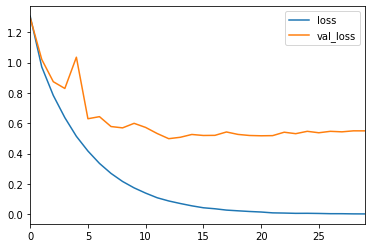

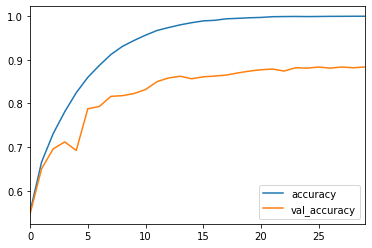

In [35]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()


### 5.Prediction on X_test dataset

In [36]:
loss,accuracy = model.evaluate(X_test,Y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

9000/9000 [==============================] - 27s 3ms/step

test loss 0.5622684538459612
accuracy 0.883222222328186
